## Evaluating a classification model

* What is the purpose of model evaluation and what are some common evaluation procedures?
* What is the usage of classification accuracy, and what are its limitations?
* How does a confussion matrix describe the performance of a classifier?
* What metrics can be computed from a confusion matrix?
* How can you adjust classifer performance by changing the classification threshold?
* What is the purpose of an ROC curve?
* How does Area Under the Curve (AUC) differ from classification accuracy?

## Review of model evaluation

* Need a way to choose between models.
* We use a **model evaluation procedure** to estimate how well a model will generalize to out-of-sample data.
* This requires a **model evaluation metric** to quantify the model performance.

## Model evaluation metrics

* **Regression problems**. Mean Absolute Error, Mean Squared Error, Root Mean Squared Error.
* **Classification problems**. Classification Accuracy.

However there are many other metrics for both of them.

In [2]:
# read the data into a pandas DataFrame
import pandas as pd
path = 'https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/pima-indians-diabetes.data'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(path, header=None, names=col_names)

**Question**. Can we predict the diabetes status of a patient given their health measurements?

In [4]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
feature_cols = ["pregnant", "insulin","bmi","age"]
X = pima[feature_cols]
y = pima["label"]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [8]:
from sklearn.linear_model import LogisticRegression

In [10]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [11]:
y_pred_class = logreg.predict(X_test)

**Classification accuracy:** percentage of correct predictions.

In [12]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.6770833333333334


However, every time we train a classification model we should compare the accuracy with **null accuracy** which is the accuracy that could be achieved by always predicting the most frequent class in the testing set.

In [13]:
#Calculating the proportion of ones
y_test.mean()

0.3229166666666667

In [15]:
#Calculating the proportion of zeroes
1-y_test.mean()

0.6770833333333333

In [16]:
max(y_test.mean(), 1-y_test.mean())

0.6770833333333333

In [17]:
y_test.value_counts()/len(y_test)

0    0.677083
1    0.322917
Name: label, dtype: float64

This shows a weakness of classification accuracy. It does not tell anything about the underlying distribution of the testing set.

In [21]:
# The model has no problem predicting the zeroes but it is so difficult for it to predict the ones.
print(y_test.values[0:25])
print(y_pred_class[0:25])

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
[0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


## Confusion matrix

It is a contingency table that describes the performance of a classification model.

In [25]:
cf = metrics.confusion_matrix(y_test, y_pred_class)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[114  16]
 [ 46  16]]


**Important**. All metrics in sklearn expect the true values as its first argument.

**Basic terminology**

* Upper left. True negatives (TN).
* Lower right. True positives (TP).
* Upper right. False positives (FP) (Type I error).
* Lower left. False negatives (FN) (Type II error).

## Metrics computed from a confusion matrix

**Classification accuracy**. Overall, how often is the classifier incorrect?

In [29]:
TP = cf[1][1]
TN = cf[0][0]
FP = cf[0][1]
FN = cf[1][0]

In [30]:
accuracy = (TP+TN)/float(TP+TN+FP+FN)
print(accuracy)

0.6770833333333334


**Classification error**. Aka misclassification rate.

In [32]:
class_error = (FP+FN)/float(TP+TN+FP+FN)
print(class_error)

0.3229166666666667


**Sensitivity**. This answers the question: When the actual value is positive, how often is the prediction correct?

AKA **true positive rate** or **recall**

In [33]:
sens = TP/float(TP+FN)
print(sens)

0.25806451612903225


**Specificity**. This answers the question: When the actual values is negative, how often the prediction is correct?

This measures how specific (or selective) is the classifier in predicting positive instances.

In [34]:
spec = TN/float(TN+FP)
print(spec)

0.8769230769230769


**False positive rate**. When the actual value is negative, how often the prediction is incorrect?

It is also 1 - specificity

In [36]:
fpr = FP/float(TN+FP)
print(fpr)

0.12307692307692308


**Precision**. When a positive value is predicted, how often is the prediction correct?

This measures how precise is the classifier when predicting positive instances.

In [37]:
prec = TP/float(TP+FP)
print(prec)

0.5


Other scores are Mathews correlation coefficient and f1 score.

Which metric to optimize largely depends on the business subject.

## Adjusting the classification threshold

In [39]:
logreg.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [46]:
#Class1 is only predicted when the probability of positive (1) exceeds a threshold of 0.5, otherwise a 0 is predicted
logreg.predict_proba(X_test)[0:10]

array([[0.61405867, 0.38594133],
       [0.7505398 , 0.2494602 ],
       [0.74167648, 0.25832352],
       [0.60291327, 0.39708673],
       [0.88426611, 0.11573389],
       [0.87695895, 0.12304105],
       [0.50819992, 0.49180008],
       [0.44582289, 0.55417711],
       [0.77950769, 0.22049231],
       [0.25853303, 0.74146697]])

In [50]:
y_pred_prob = logreg.predict_proba(X_test)[0:10,1]

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size']  = 14

Text(0.5, 0, 'Predicted probability of diabetes')

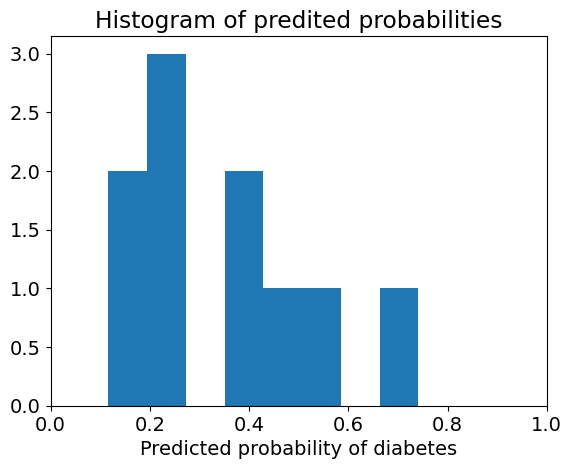

In [53]:
#Histogram of predicted probabilities
plt.hist(y_pred_prob, bins = 8)
plt.xlim(0,1)
plt.title("Histogram of predited probabilities")
plt.xlabel("Predicted probability of diabetes")

We see that depending on the value of the threshold we get a different number of ones predicted. This changes both sensitivity and specificity at the same time

### Decrease the threshold for predicting diabetes in order to increase the sensitivity of the classifier

In [54]:
from sklearn.preprocessing import binarize

In [81]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]

In [83]:
y_pred_prob = y_pred_prob.reshape(-1,1)

In [84]:
y_pred_class = binarize(y_pred_prob, threshold = 0.3)

In [86]:
y_pred_class = y_pred_class.reshape(1,-1)

In [87]:
metrics.confusion_matrix(y_test, y_pred_class)

ValueError: Found input variables with inconsistent numbers of samples: [192, 1]

In [75]:
y_pred

NameError: name 'y_pred' is not defined

## ROC Curves and Area Under the Curve (AUC)

**Question**: Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, without actaully changing the threshold?

**Answer**. Plot the ROC curve!

In [89]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

Text(0, 0.5, 'True Positive Rate (sensitivity)')

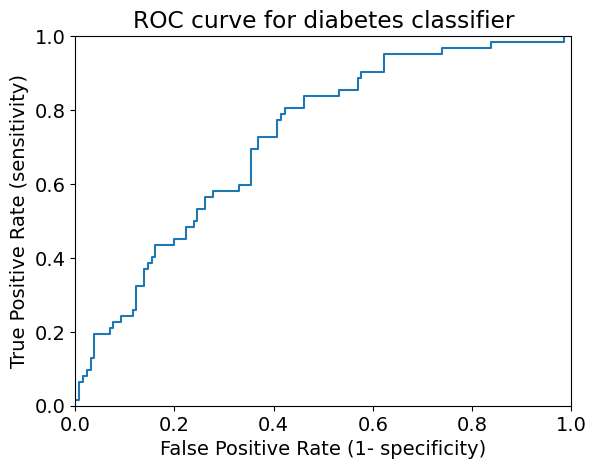

In [92]:
plt.plot(fpr, tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title("ROC curve for diabetes classifier")
plt.xlabel("False Positive Rate (1- specificity)")
plt.ylabel("True Positive Rate (sensitivity)")

* ROC curve can help you choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context.

* You can't actually see the thresholds used to generate the curve on the ROC curve itself.

In [97]:
def evaluate_threshold(threshold):
    print("Sensitivity", tpr[thresholds>threshold][-1])
    print("Specificity", 1-fpr[thresholds>threshold][-1])

In [98]:
evaluate_threshold(0.5)

Sensitivity 0.25806451612903225
Specificity 0.8769230769230769


In [99]:
evaluate_threshold(0.4)

Sensitivity 0.5
Specificity 0.7538461538461538


In [100]:
evaluate_threshold(0.9)

Sensitivity 0.0
Specificity 1.0


AUC is the area under the ROC curve. AUC is a global measure of performance of the model. Therefore is usually used as an evaluation metric as an alternative for the classification accuracy.

In [102]:
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.7227047146401985


* AUC is a single number summary of classifer performance.
* If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a higher perdicted probability to the positive observation.
* AUC is useful even when there is high class imbalance (unlike classification accuracy).

### Confusion matrix advantages:

* Allows you to calculate a variety of metrics.
* Useful for multi-class problems (more than two response classes).

### ROC/AUC advantages:

* Does not require you to set a classification threshold.
* Still useful when ther is high class imbalance.
* Less interpretable for multi-class problems.